<a href="https://colab.research.google.com/github/Usharbudha/Deep-Learning-SEM-3/blob/master/Assignment_6(Cifar_100).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from keras.datasets import cifar100

(X_train,y_train),(X_test,y_test)=cifar100.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Normalize pixel values to be between 0 and 1
X_train,X_test=X_train/255.0,X_test/255.0

169009152/169001437 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
from keras.models import Sequential
from keras.layers import Dense


model=tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128,activation='softmax'),
tf.keras.layers.Dense(100)
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 15, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 64)          2

In [4]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))


Epoch 1/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.4995 - accuracy: 0.0311 - val_loss: 4.4941 - val_accuracy: 0.0271
Epoch 2/30
1563/1563 [==============================] - 5s 3ms/step - loss: 4.3855 - accuracy: 0.0363 - val_loss: 4.4308 - val_accuracy: 0.0297
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.3354 - accuracy: 0.0369 - val_loss: 4.3583 - val_accuracy: 0.0340
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.3051 - accuracy: 0.0389 - val_loss: 4.4056 - val_accuracy: 0.0397
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.2856 - accuracy: 0.0409 - val_loss: 4.2911 - val_accuracy: 0.0368
Epoch 6/30
1563/1563 [==============================] - 5s 3ms/step - loss: 4.2854 - accuracy: 0.0373 - val_loss: 4.2770 - val_accuracy: 0.0406
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.2670 - accuracy: 0.0405 - val_loss: 4.2499 - val_accuracy:

313/313 - 1s - loss: 4.2146 - accuracy: 0.0497


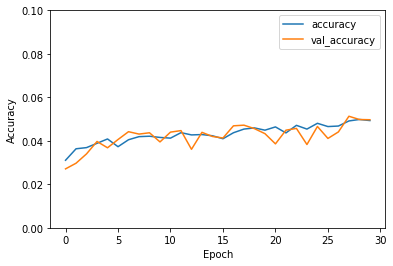

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,0.1])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

After Hypertuning the model

In [11]:
from keras.models import Sequential                         
from keras.layers import Dense, Dropout, Activation, Flatten,Conv2D,MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD, Adam, RMSprop

model_sgd = Sequential()
model_sgd.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model_sgd.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model_sgd.add(MaxPooling2D((2,2)))
model_sgd.add(Dropout(0.1))
model_sgd.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model_sgd.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model_sgd.add(MaxPooling2D((2,2)))
model_sgd.add(Dropout(0.1))
model_sgd.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model_sgd.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model_sgd.add(MaxPooling2D((2,2)))
model_sgd.add(Dropout(0.1))
model_sgd.add(Flatten())
model_sgd.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model_sgd.add(Dropout(0.1))
model_sgd.add(Dense(100,activation='softmax'))


opt = SGD(lr=0.001, momentum=0.9)
#model_sgd.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#initial_learning_rate=0.01
#lr_schedule=tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,decay_steps=100000,decay_rate=0.96,staircase=True)
#tf.keras.optimizers.SGD(learning_rate=lr_schedule)
model_sgd.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history_sgd=model_sgd.fit(X_train,y_train,epochs=100,batch_size=64,validation_data=(X_test,y_test),verbose=1)


Epoch 1/100
782/782 [==============================] - 6s 8ms/step - loss: 4.6047 - accuracy: 0.0103 - val_loss: 4.6046 - val_accuracy: 0.0100
Epoch 2/100
782/782 [==============================] - 6s 7ms/step - loss: 4.6044 - accuracy: 0.0100 - val_loss: 4.6044 - val_accuracy: 0.0100
Epoch 3/100
782/782 [==============================] - 6s 7ms/step - loss: 4.6039 - accuracy: 0.0101 - val_loss: 4.6042 - val_accuracy: 0.0099
Epoch 4/100
782/782 [==============================] - 6s 7ms/step - loss: 4.6035 - accuracy: 0.0106 - val_loss: 4.6036 - val_accuracy: 0.0106
Epoch 5/100
782/782 [==============================] - 6s 7ms/step - loss: 4.6030 - accuracy: 0.0117 - val_loss: 4.6033 - val_accuracy: 0.0119
Epoch 6/100
782/782 [==============================] - 6s 7ms/step - loss: 4.6025 - accuracy: 0.0136 - val_loss: 4.6025 - val_accuracy: 0.0143
Epoch 7/100
782/782 [==============================] - 6s 7ms/step - loss: 4.6013 - accuracy: 0.0164 - val_loss: 4.6009 - val_accuracy: 0.0187